Insights from the bike pooling dataset

In [2]:
import numpy as np
import pandas as pd


In [4]:
#Reading the data from the csv
df=pd.read_csv(r'c:\users\vkatepally\Downloads\bike-data.csv')

In [8]:
#getting the basic insights from the data
df.describe()

#from the below table we can say that there are missing values in member_birth_year and member_gender columns


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [35]:
# In the data we have latitude and longtitude information so we can find the distance for each and every trip


def distance(x):
    

    # approximate radius of earth in km
    radius = 6373.0
    #print(x[0])
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(x[2])
    lon2 = radians(x[3])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    dist = radius * c
    
    return dist

d1=df.iloc[:,5:7].join(df.iloc[:,9:11])
df['distance']=d1.apply(distance,axis=1)
#print(df['distance'])


print(df)

        duration_sec                start_time                  end_time  \
0              80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1              78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2              45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3              62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4              43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5               9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
6               4507  2017-12-31 23:49:28.4220  2018-01-01 01:04:35.6190   
7               4334  2017-12-31 23:46:37.1960  2018-01-01 00:58:51.2110   
8               4150  2017-12-31 23:37:07.5480  2018-01-01 00:46:18.3080   
9               4238  2017-12-31 23:35:38.1450  2018-01-01 00:46:17.0530   
10              3292  2017-12-31 23:46:32.4030  2018-01-01 00:41:24.6050   
11              3177  2017-12-31 23:48:11.7570  2018-01-01 00:41:09.5810   
12          

In [16]:
#could not install the geopy package 
#geopy pacakge is used for finding the distance between the 2 points if the latitudes and longtitudes are known
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print geopy.distance.vincenty(coords_1, coords_2).km

SyntaxError: invalid syntax (<ipython-input-16-8dd8359700f2>, line 6)




Distribution of trips based on customers
    


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,0.0
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN,0.0
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,0.0
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN,0.0
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN,0.0
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN,0.0
49,782,2017-12-31 23:15:25.7580,2017-12-31 23:28:28.3720,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,1691,Customer,NaN,NaN,0.0
50,799,2017-12-31 23:15:08.3850,2017-12-31 23:28:28.2040,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,533,Customer,NaN,NaN,0.0
51,575,2017-12-31 23:17:57.8670,2017-12-31 23:27:32.8800,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,1568,Customer,NaN,NaN,0.0
61,2659,2017-12-31 22:23:06.1720,2017-12-31 23:07:25.7570,230,14th St at Mandela Pkwy,37.810743,-122.291415,230,14th St at Mandela Pkwy,37.810743,-122.291415,2335,Customer,NaN,NaN,0.0


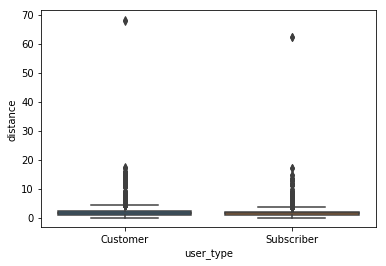

In [50]:
import seaborn as sbn
sbn.boxplot(x=df['user_type'],y=df['distance'],data=df)
#sbn.pairplot()
df[df['distance']==0]


In [ ]:
#We have calculated the distance of each and every trip and stored in distance column 
#Now we have distance and time of each and every trip
#lets define the traffic using distance and time  into three levels like low,medium and high
#lets assume the average speed in USA is 40 km/hr